Ryan Malmfelt

ITCS 3162

10/30/2024

Project 3: Regression

FIFA23 Player Data

INTRODUCTION:

FIFA, the international governing body for soccer, has long been a prominent force in promoting and developing the sport worldwide. One of its most popular products, the FIFA video game series, has captivated millions of players and fans alike, offering a realistic simulation of soccer and engaging users with features like player ratings and career modes. Among the most intriguing aspects of this virtual soccer experience is the prediction of player potential, which captivates gamers and scouts seeking to identify emerging talent in the sport.
Predicting player potential involves analyzing various factors, such as a player's current performance metrics, age, and developmental trajectory. Utilizing advanced data analytics and machine learning techniques, clubs can assess the likelihood of a player's growth and success in professional leagues. This process not only enhances the competitive edge for teams but also provides invaluable insights for gamers looking to build the ultimate squad. By exploring the factors that contribute to player potential and employing data-driven models, we can gain a deeper understanding of how young athletes evolve and thrive in the dynamic world of soccer. As the sport continues to evolve, the ability to accurately predict player potential will be vital for both clubs and fans, ensuring that the beautiful game remains at the forefront of global entertainment. Overall this project will focus on predicting player potential using regression.


DATASET DESCRIPTION:

The FIFA Player Dataset includes a comprehensive collection of data pertaining to soccer players featured in the FIFA video game series. This dataset is instrumental for analyzing player performance and potential, offering insights into various attributes that contribute to a player's success in the virtual and real-world soccer environments.

Key Features of the dataset:
Player Identification: Each player is uniquely identified by player_id, complemented by a player_url that provides access to additional information.

FIFA Version and Update: The dataset includes fifa_version, fifa_update, and fifa_update_date, reflecting the game's evolution and the incorporation of new player statistics and attributes.

Player Information: Attributes such as short_name, long_name, player_positions, overall, and potential give insights into each player’s identity and skill level, essential for team building and scouting.

Financial Attributes: The value_eur and wage_eur metrics indicate the player's market value and salary, respectively, which are critical for financial analysis in player transfers.

Demographic Information: Players’ age, dob, height_cm, and weight_kg provide demographic context that can impact performance and player development.

League and Club Information: Features like league_id, league_name, club_team_id, and club_name categorize players by their respective leagues and clubs, offering insights into competitive environments.

Performance Metrics: The dataset includes extensive performance metrics such as pace, shooting, passing, dribbling, defending, and physic, which are crucial for assessing player abilities and style of play.

Skill Attributes: Attributes related to skills, such as skill_moves, weak_foot, and attacking_crossing, provide detailed information about a player's technical abilities.

Physical and Mental Attributes: Metrics like movement_acceleration, mentality_vision, and defending_marking_awareness help in evaluating a player’s physical fitness and mental acuity on the field.

National and Club Representation: Features like nationality_id, nationality_name, nation_team_id, and nation_position reflect the player's international affiliations, enhancing the dataset's comprehensiveness.

This dataset is useful for a variety of analyses, including predicting player potential, evaluating player performance, scouting for talent, and informing strategic decisions for club management and gameplay in FIFA. The rich array of features allows for the application of machine learning models to uncover patterns and relationships within the data, paving the way for enhanced player evaluations and team strategies. Whether for academic research, sports analytics, or gaming enhancement, the FIFA Player Dataset serves as a vital resource for understanding the dynamics of soccer talent.

Link to dataset: https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset?select=male_players+%28legacy%29.csv





REGRESSION

Regression is a statistical method used to understand relationships between variables. The goal is to predict a target variable based on one or more predictor variables. In a regression model, we aim to establish a mathematical equation that describes how the predictor variables relate to the target variable. 
Linear regression is one of the most fundamental and widely used forms of regression. It assumes a linear relationship between the independent variables and the dependent variable. The general formula for a linear regression model is:

Y = β0​ + β1​x1​+ β2​x2​+ ⋯ + βn​xn ​+ ϵ

Where:

y is the dependent variable.

x1, x2, …, xn are the independent variables.

β0​ is the intercept

β1​, β2​, …, βn​ are the coefficients or weights associated with each independent variable.

ϵ is the error term.


How It Works:

The relationship between the target variable and predictors is assumed to be linear, meaning changes in predictors lead to proportional changes in the target.The goal is to find the best-fitting line by minimizing the error between the actual and predicted values. This is typically done using Ordinary Least Squares, which minimizes the sum of the squared residuals. 

Evaluation Metrics:
R-squared: Measures the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating perfect predictions.

Mean Squared Error: The average of the squared differences between predicted and actual values.






DATA UNDERSTANDING/PREPROCESSING

I began my data preprocessing by making sure the usability of the dataset I chose was high. I wanted to check the usability of the dataset because if the usability of the dataset is low, then how are you gonna know if you're going to get good and accurate results?   The usability of the dataset I pulled from Kaggle was 10/10; so the dataset is very well functional and good to use for the predictions that I intend to answer. Next I wanted to make sure that I was able to pull the CSV file and copy it into my notebook in order to have all the features that the file included. This step is needed to make sure you have the correct data in order to answer your questions. I then created a sub dataset that uses only the fifa_version of 23. This is needed because the original dataset consists of fifa_version 15-23. I will be focusing only on the 23 version. Another step that I chose to take was to look for null values in the dataset. It is important to check for null values because having null values means that you have unknown values in your dataset and could mix up your potential results. After looking for null values the features that I want to look at contain zero null values. I then moved on to the visualization part of data understanding. 

I used the describe method in order to generate descriptive statistics of the DataFrame. It provides a quick summary of the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values by default. I then made a histogram that shows the distribution of overall rating of all the players in the FIFA 23 version. The next visualization that I made is a box plot that looks at the wage Distribution of the players. The wage is in euros for clarification. Next I created a pairplot that shows the relationship between overall, potential, age, and value euro. The last thing that I wanted to create is a scatter plot that shows the relationship between wage (euros) and the overall rating of the player. Using these visualizations we can sort of get a better understanding of some features in the dataset.

 




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'C:\Users\malmf\AppData\Local\Temp\fffd5e9a-502f-44fe-92a7-c7d742815ef9_archive (8).zip.ef9\male_players (legacy).csv')

df_fifa23 = df[df['fifa_version'] == 23]

null_counts = df_fifa23.isnull().sum()
print(null_counts)





C:\Users\malmf\AppData\Local\Temp\ipykernel_39224\3797436069.py:8: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\malmf\AppData\Local\Temp\fffd5e9a-502f-44fe-92a7-c7d742815ef9_archive (8).zip.ef9\male_players (legacy).csv')


player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
Length: 110, dtype: int64


In [2]:
print(df_fifa23.head())

# Summary statistics for the filtered dataset
print(df_fifa23.describe())

# Check data types
print(df_fifa23.dtypes)

# Check for missing values
missing_values_fifa23 = df_fifa23.isnull().sum()
print(missing_values_fifa23[missing_values_fifa23 > 0])

        player_id                                player_url  fifa_version  \
143050     158023        /player/158023/lionel-messi/230002            23   
143051     165153       /player/165153/karim-benzema/230002            23   
143052     188545  /player/188545/robert-lewandowski/230002            23   
143053     192985     /player/192985/kevin-de-bruyne/230002            23   
143054     231747       /player/231747/kylian-mbappe/230002            23   

        fifa_update fifa_update_date      short_name  \
143050            2       2022-09-26        L. Messi   
143051            2       2022-09-26      K. Benzema   
143052            2       2022-09-26  R. Lewandowski   
143053            2       2022-09-26    K. De Bruyne   
143054            2       2022-09-26       K. Mbappé   

                             long_name player_positions  overall  potential  \
143050  Lionel Andrés Messi Cuccittini               RW       91         91   
143051                   Karim Benzema    

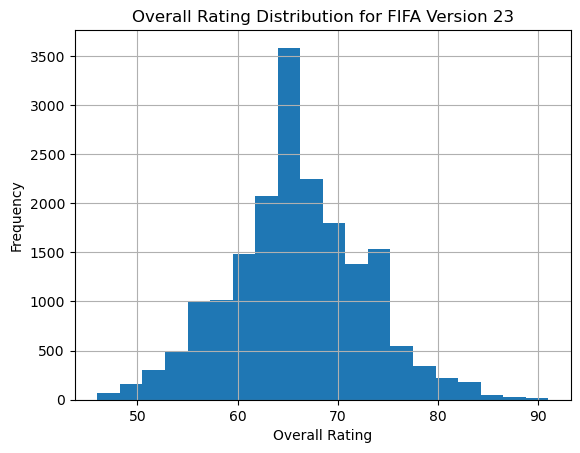

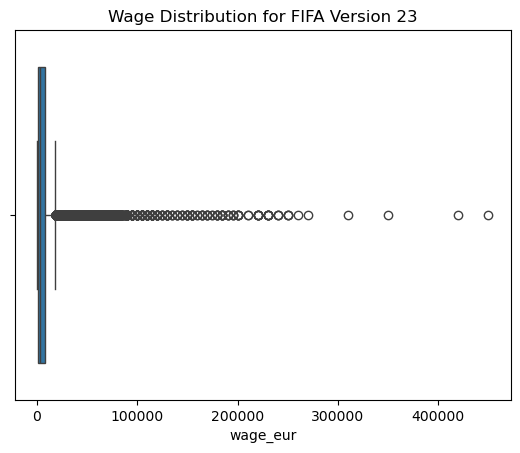

In [3]:
# Histogram for overall ratings
df_fifa23['overall'].hist(bins=20)
plt.title('Overall Rating Distribution for FIFA Version 23')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot for wage
sns.boxplot(x='wage_eur', data=df_fifa23)
plt.title('Wage Distribution for FIFA Version 23')
plt.show()

First Looking at the histogram that shows the distribution of overall rating of players. In FIFA you are given a overall rating. This rating is between 0 and 100 with the best players in the world being in the low-mid 90s. We can see that most of the players are rated between 60 and 70. The outliers we see here are more in the 80-90 range because this histogram is slightly right skewed. Then looking at the box plot. As it shows only 4 players made over 300,000 euros. Like overall this probably means they are some of the best players in the game. Most of the players in FIFA seem to make around 50-200,000 euros.

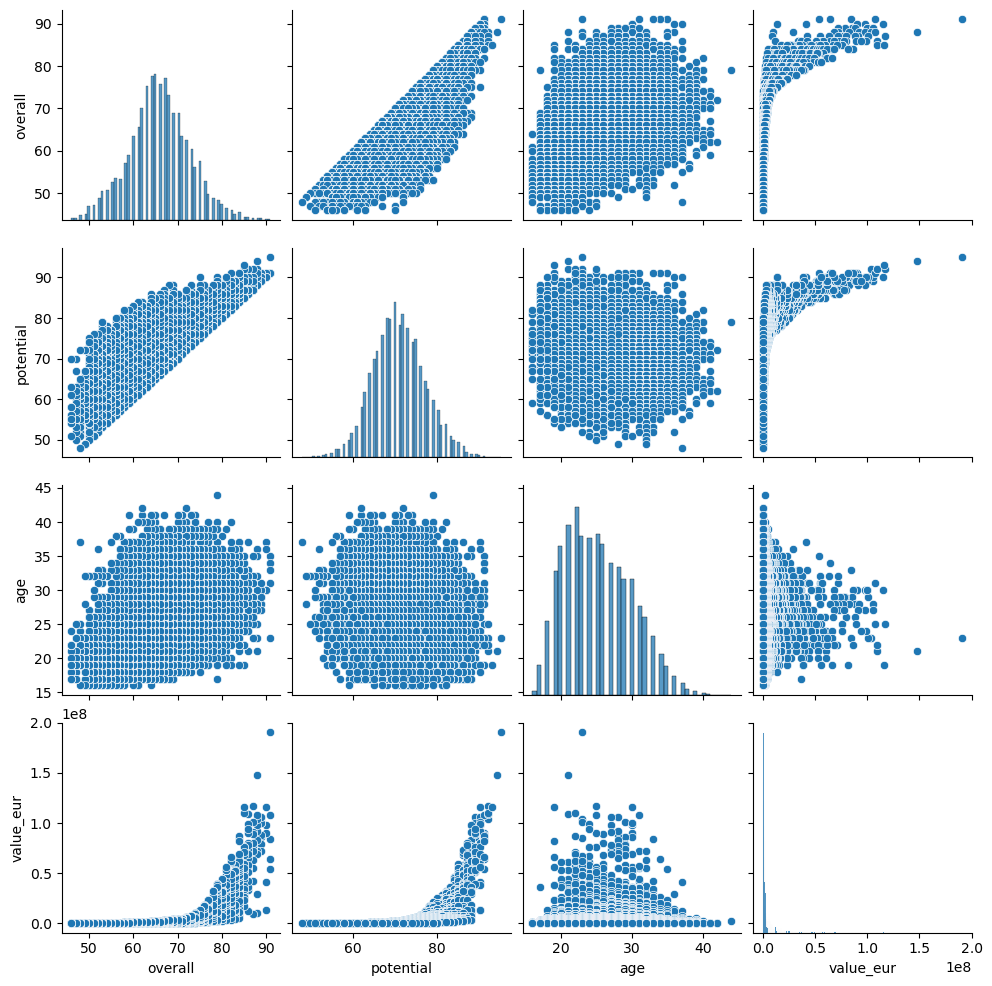

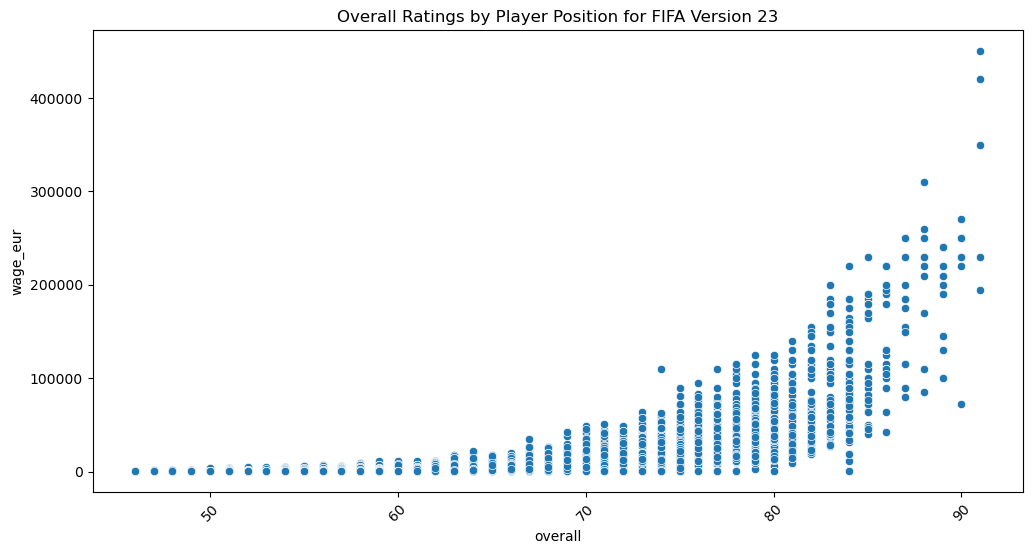

In [4]:
sns.pairplot(df_fifa23[['overall', 'potential', 'age', 'value_eur']])
plt.show()



plt.figure(figsize=(12, 6))
sns.scatterplot(x='overall', y='wage_eur', data=df_fifa23)
plt.title('Overall Ratings by Player Position for FIFA Version 23')
plt.xticks(rotation=45)
plt.show()






The final two visualizations I wanted to make to understand the data better is a pairplot to show the different relationships between ceratin feature of the dataset and a scatterplot that shows relationship between wage and overall. First looking at the pairplot. Certain features had a stronger relationship like overall and potential and some had a weaker relationship like age and potential. Then looking at the scatterplot. The higher overall a player is the more money they are making. This makes sense because the better the player is, the more money they are likley to make.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Fill any missing values
df_fifa23.fillna(0, inplace=True)

# Define target (y) and features (X)
# Target: player potential
y = df_fifa23['potential']

# Features: we select relevant attributes for predicting potential
x = df_fifa23[['overall', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 6.489893121924767
R-squared: 0.8264954757343577


C:\Users\malmf\AppData\Local\Temp\ipykernel_39224\1549766718.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifa23.fillna(0, inplace=True)


After running the linear regression model I decided to first focus on Mean Squared Error and R-Squared value.

Mean Squared Error:

An MSE of 6.49 suggests that, on average, the squared difference between the predicted potential and the actual potential is relatively small. This indicates that my model's predictions are fairly accurate, but there's still room for improvement. In practical terms, a lower MSE would mean my model is doing a better job at predicting player potential.

R-squared:

An R² value of 0.826 implies that approximately 82.65% of the variance in player potential can be explained by the features I'm using. This is a strong indication that your model captures a significant amount of the underlying relationships between the features and player potential. However, it also suggests that about 17.35% of the variance is unexplained, which could be due to other factors not included in my model or inherent randomness.

In [13]:
x_exp2a = df_fifa23[['overall', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
                     'attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'skill_dribbling',
                     'movement_acceleration', 'power_stamina', 'mentality_vision', 'mentality_composure',
                     'defending_standing_tackle']]
x_train_exp2a, x_test_exp2a, y_train, y_test = train_test_split(x_exp2a, y, test_size=0.2, random_state=42)

model_exp2a = LinearRegression()
model_exp2a.fit(x_train_exp2a, y_train)

y_pred_exp2a = model_exp2a.predict(x_test_exp2a)
mse_exp2a = mean_squared_error(y_test, y_pred_exp2a)
r2_exp2a = r2_score(y_test, y_pred_exp2a)

print("Experiment 2a Results with Additional Attributes:")
print(f"Mean Squared Error: {mse_exp2a}")
print(f"R-squared: {r2_exp2a}")

from sklearn.ensemble import RandomForestRegressor

model_exp2b = RandomForestRegressor(random_state=42)
model_exp2b.fit(x_train, y_train)

y_pred_exp2b = model_exp2b.predict(x_test)
mse_exp2b = mean_squared_error(y_test, y_pred_exp2b)
r2_exp2b = r2_score(y_test, y_pred_exp2b)

# Print results for Experiment 2b
print("Experiment 2b Results with Random Forest Regressor:")
print(f"Mean Squared Error: {mse_exp2b}")
print(f"R-squared: {r2_exp2b}")

Experiment 2a Results with Additional Attributes:
Mean Squared Error: 6.305363809128839
R-squared: 0.8314287881985586
Experiment 2b Results with Random Forest Regressor:
Mean Squared Error: 2.9548625357742653
R-squared: 0.9210030105414382


Experiment 2a (with additional attributes):

Mean Squared Error (MSE): 6.31 (compared to the initial 6.49)
R-squared: 0.83 (compared to the initial 0.83)
By including more detailed player attributes, I achieved a small improvement in both MSE and R-squared. This suggests that these specific skills contribute a little extra predictive power for player potential.

Experiment 2b (with Random Forest Regressor):

Mean Squared Error (MSE): 2.95
R-squared: 0.92
The Random Forest model outperformed both the original Linear Regression and Experiment 2a in terms of both MSE and R-squared. The substantial decrease in MSE and increase in R-squared indicates that Random Forest captures non-linear relationships and interactions among features more effectively.


Switching to a more complex model like Random Forest provided the most significant boost in predictive performance, indicating that player potential is likely influenced by more complex, non-linear interactions between attributes.

C:\Users\malmf\AppData\Local\Temp\ipykernel_39224\2344945992.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['overall_pace'] = X['overall'] * X['pace']
C:\Users\malmf\AppData\Local\Temp\ipykernel_39224\2344945992.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['overall_dribbling'] = X['overall'] * X['dribbling']
C:\Users\malmf\AppData\Local\Temp\ipykernel_39224\2344945992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

XGBoost - Mean Squared Error: 0.8750, R-squared: 0.9766
Stacking Ensemble - Mean Squared Error: 0.9002, R-squared: 0.9759


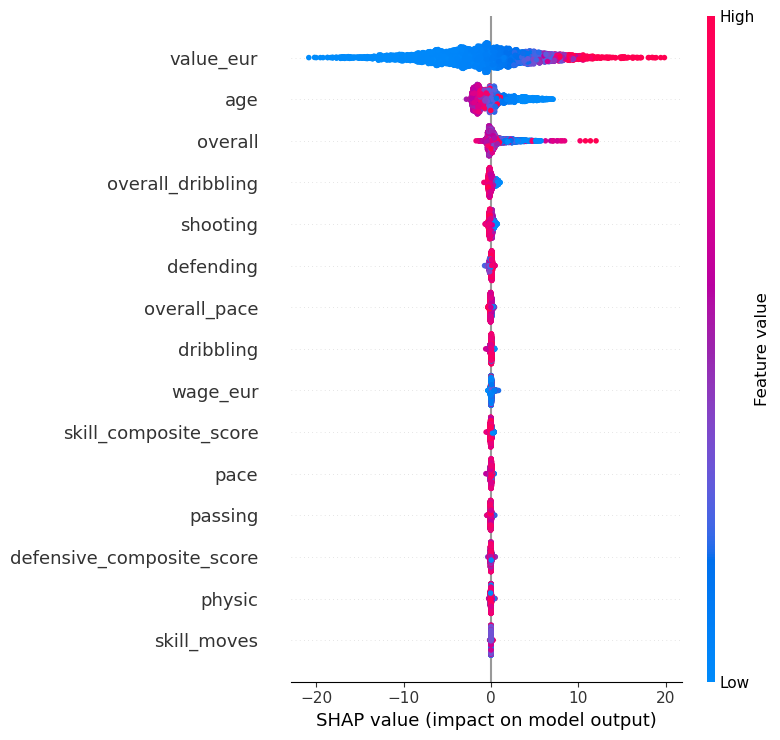

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import shap



# Define target (y) and features (X)
y = df_fifa23['potential']
X = df_fifa23[['overall', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'value_eur', 'wage_eur', 'skill_moves']]

# Create interaction and composite features
X['overall_pace'] = X['overall'] * X['pace']
X['overall_dribbling'] = X['overall'] * X['dribbling']
X['skill_composite_score'] = (X['pace'] + X['shooting'] + X['passing'] + X['dribbling']) / 4
X['defensive_composite_score'] = (X['defending'] + X['physic']) / 2

# Normalize continuous features
scaler = MinMaxScaler()
X[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']] = scaler.fit_transform(X[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models


xgb_model = XGBRegressor()

# Create a stacking ensemble model
estimators = [('xgb', xgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Fit models and evaluate
models = {'XGBoost': xgb_model, 'Stacking Ensemble': stacking_model}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'R-squared': r2
    }


for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['MSE']:.4f}, R-squared: {metrics['R-squared']:.4f}")

# SHAP Analysis for one of the models 
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)

Here is an overall summary of results regrading the improvement of the models:

Linear Regression:

MSE: 6.4899
R-squared: 0.8265
Interpretability: While easy to interpret, the performance indicates that Linear Regression may not adequately capture the complexities of the dataset, leading to a higher error rate.

Random Forest Regressor:

MSE: 2.9549
R-squared: 0.9210
Robustness: This model significantly outperforms Linear Regression, demonstrating its ability to handle non-linear relationships and interactions between features more effectively.

XGBoost:

MSE: 0.8750
R-squared: 0.9766
Complexity and Performance: XGBoost stands out as the best-performing model with the lowest MSE and the highest R-squared, indicating it captures a large proportion of the variance in player potential.

Stacking Ensemble:

MSE: 0.9002
R-squared: 0.9759
Combination Strengths: The stacking model, while slightly less effective than XGBoost, still provides strong performance by leveraging predictions from multiple models.


Key Takeaways
Significant Improvement: The Random Forest model shows a substantial improvement over Linear Regression, reducing the MSE from 6.4899 to 2.9549, and increasing the R-squared from 0.8265 to 0.9210. This indicates that the more complex model captures the underlying patterns in the data much better.

Top Performer: XGBoost delivers outstanding performance with an MSE of 0.8750, suggesting it is highly effective at modeling the target variable compared to both the simpler Linear Regression and the Random Forest model.

Model Selection Importance: The results clearly show the importance of selecting the right model. As the complexity of the model increases, the predictive accuracy improves significantly.

Stacking Ensemble: While the stacking ensemble is a robust method that combines multiple models, in this case, XGBoost remains the most effective single model.

I also included a SHAP visualization that shows the feature importance for the ones I chose. You can see that most of the features have high importance and some are on the lower end of importance for predicying potential in a player.


In summary, the analysis highlights that while Linear Regression serves as a good baseline, the Random Forest and XGBoost models demonstrate considerably better performance in predicting player potential. The use of more sophisticated models is essential in scenarios where the relationships in the data are complex. The stacking ensemble also offers a good alternative but does not outperform the best single model in this case.


IMPACT:

Social Impact

Player Development:

Positive Impact: The ability to accurately predict player potential can significantly aid coaches and scouts in identifying talent. This can lead to better training programs tailored to individual players, enhancing their skills and overall development. As a result, clubs may develop more well-rounded athletes who can perform at higher levels.

Negative Impact: There is a risk that reliance on predictive models may overshadow the importance of intangible qualities such as teamwork, determination, and work ethic. If clubs overly prioritize model outputs, they might overlook promising players who don’t fit the predicted profiles but have other valuable attributes.

Ethical Impact

Data Privacy:

Positive Impact: By utilizing available player data ethically, the project can contribute to a more data-driven approach in sports analytics, potentially leading to enhanced player performance and satisfaction.

Negative Impact: There are ethical considerations regarding data privacy, especially when dealing with personal information about young athletes. Mismanagement of this data could lead to breaches of privacy and trust, impacting players and their families.

Transparency and Fairness:

Positive Impact: The transparency of the modeling process can promote fairness in recruitment practices by providing objective measures for evaluating player potential, which can reduce biases based on subjective opinions.

Negative Impact: However, if the algorithms used in the models are opaque or based on flawed data, this could lead to unfair assessments of players. For instance, certain attributes might be improperly weighted, leading to misjudgments about a player’s true potential.

Economic Impact

Club Investments:

Positive Impact: By accurately predicting player potential, clubs can make more informed investment decisions, leading to better financial outcomes. They could potentially spend less on underperforming players and focus on nurturing talent that shows promise.

Negative Impact: This reliance on data-driven predictions might lead to financial pressures to adhere to model recommendations, potentially pushing clubs to focus on short-term gains at the expense of long-term player development and well-being.



CONCLUSION:

Throughout this project, I have gained valuable insights into the application of machine learning techniques for predicting player potential in FIFA 23. The experiments conducted allowed me to explore various models, pre-processing steps, and feature selections, each contributing to a deeper understanding of the complexities involved in predictive modeling.

Experimentation with different features revealed the significant impact of feature selection on model performance:

Adding Composite Features: 

Creating interaction and composite features, such as overall_pace and skill_composite_score, allowed the model to capture relationships between variables that might not be apparent when using raw features alone. This resulted in improved performance metrics.
Feature Relevance: During the experiments, it became clear that certain attributes, such as overall, value_eur, and skill_moves, were more predictive of player potential than others. Including or excluding features based on their relevance significantly influenced the outcomes. For instance, incorporating wage_eur and value_eur provided additional context for evaluating a player's market worth alongside their potential.


Model Comparisons and Performance Gains:

Through the various modeling approaches, I learned the following:

Linear Regression and Random Forest: The initial experiments with Linear Regression and Random Forest provided a solid baseline. While Random Forest showed improved performance over Linear Regression, with a Mean Squared Error of approximately 2.95, it was still limited compared to the results achieved with more advanced models.

Advanced Models: The use of XGBoost and Stacking Regressor resulted in substantial improvements, with Mean Squared Errors dropping to around 0.87 for XGBoost. The high R-squared values (around 0.976) demonstrated that these models could explain a significant proportion of the variance in player potential, highlighting their effectiveness for this type of prediction task.

Ensemble Techniques: Implementing stacking and ensemble methods showcased how combining different models can lead to better predictions. The Stacking Regressor slightly underperformed compared to XGBoost alone, but it emphasized the benefits of blending various predictive approaches to capture different aspects of the data.

Model Interpretability:

Utilizing SHAP (SHapley Additive exPlanations) values provided insights into the models' decision-making processes. Understanding feature importance helped in evaluating which attributes were driving predictions, reinforcing the importance of certain features while also revealing potential biases in the model. This interpretability is essential for stakeholders when applying the model in real-world settings, as it builds trust in the predictions made.


REFERENCES:

https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset?select=male_players+%28legacy%29.csv

https://www.geeksforgeeks.org/ml-linear-regression/

https://shap.readthedocs.io/en/latest/index.html
